### Data Drift: Visualizing Concept Drift
**Description**: Simulate concept drift by gradually changing the distribution of a binary target variable over simulated time periods. Plot these changes.

<Figure size 1000x600 with 0 Axes>

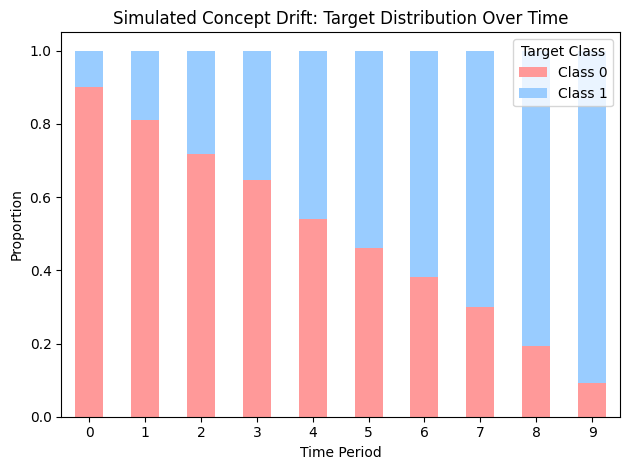

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_concept_drift(time_periods, samples_per_period):
    """
    Simulate concept drift by gradually changing the distribution
    of a binary target variable over time periods.

    Parameters:
    - time_periods (int): Number of discrete time windows, must be > 0
    - samples_per_period (int): Number of samples per time period, must be > 0

    Returns:
    - df (pd.DataFrame): DataFrame containing 'time_period' and 'target' columns
    """
    # Validate input parameters
    if not (isinstance(time_periods, int) and time_periods > 0):
        raise ValueError("'time_periods' must be a positive integer")
    if not (isinstance(samples_per_period, int) and samples_per_period > 0):
        raise ValueError("'samples_per_period' must be a positive integer")

    np.random.seed(42)
    data = []

    for t in range(time_periods):
        # Probability of class 1 increases linearly from 0.1 to 0.9
        p_class1 = 0.1 + (0.8 * t / (time_periods - 1))
        
        # Generate binary target samples for current time period
        targets = np.random.choice([0, 1], size=samples_per_period, p=[1 - p_class1, p_class1])
        
        # Append samples with their time period label
        data.extend([(t, target) for target in targets])

    try:
        # Create DataFrame from simulated data
        df = pd.DataFrame(data, columns=['time_period', 'target'])
    except Exception as e:
        print(f"Error creating DataFrame: {e}")
        return None

    return df


def plot_concept_drift(df):
    """
    Plot the distribution of the binary target over time periods to visualize concept drift.

    Parameters:
    - df (pd.DataFrame): DataFrame with 'time_period' and 'target' columns
    """
    try:
        # Calculate proportion of each class per time period
        distribution = df.groupby('time_period')['target'].value_counts(normalize=True).unstack().fillna(0)

        # Plot stacked bar chart
        plt.figure(figsize=(10, 6))
        distribution.plot(kind='bar', stacked=True, color=['#FF9999', '#99CCFF'])
        plt.title('Simulated Concept Drift: Target Distribution Over Time')
        plt.xlabel('Time Period')
        plt.ylabel('Proportion')
        plt.legend(['Class 0', 'Class 1'], title='Target Class')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error during plotting: {e}")


if __name__ == "__main__":
    try:
        # Simulation parameters
        TIME_PERIODS = 10
        SAMPLES_PER_PERIOD = 1000

        # Simulate concept drift data
        df_simulated = simulate_concept_drift(TIME_PERIODS, SAMPLES_PER_PERIOD)
        if df_simulated is not None:
            plot_concept_drift(df_simulated)
    except Exception as e:
        print(f"Unexpected error: {e}")
